# **Measuring how Frozen the Labor Market is** 
## (01-01-2001 to 04-01-2025)



---

### 📊 **Derived Features Table**

| **Feature Name**                   | **Equation**                                              | **Interpretation**                                   | **Why It Matters**                                                                 | **Supply or Demand** |
| ---------------------------------- | --------------------------------------------------------- | ---------------------------------------------------- | ---------------------------------------------------------------------------------- | -------------------- |
| **OpeningsPerUnemployed**          | `Job_Openings_Rate / Unemployment_Level`                  | Openings per unemployed person                       | Signals labor tightness or slack                                                   | Demand               |
| **HiresPerUnemployed**             | `Hires_Rate / Unemployment_Level`                         | Hires per unemployed person                          | Indicates efficiency of unemployed absorption                                      | Demand               |
| **Inverse\_HiresPerUnemployed**    | `1 / HiresPerUnemployed`                                  | Low hire rate relative to unemployed                 | Highlights matching inefficiency                                                   | Supply (friction)    |
| **QuitsPerLayoffs**                | `Quits_Rate / Layoffs_and_Discharges`                     | Voluntary vs involuntary separations                 | Indicates worker confidence vs. forced exits                                       | Supply               |
| **LayoffsPerOpening**              | `Layoffs_and_Discharges / Job_Openings_Rate`              | Layoffs per job opening                              | Contradictory signal; layoffs despite openings = instability                       | Supply               |
| **NILFWJNPerPop**                  | `Not_in_Labor_Force_WantAJobNow / Total_Population`       | Hidden slack (not in labor force but want work)      | Captures discouraged potential workers missed in unemployment rate                 | Supply               |
| **U6\_U3\_Spread**                 | `U6_Unemployment_Rate - U3_Unemployment_Rate`             | Underemployment spread                               | Measures slack beyond headline unemployment                                        | Supply               |
| **RealAvgWeeklyEarningsYoY**       | `Avg_Weekly_Earnings.pct_change(12) - CPI.pct_change(12)` | Real wage growth (inflation-adjusted)                | Indicates worker purchasing power; low growth may signal distress                  | Supply               |
| **TempHelpEmploymentYoY**          | `Temp_Help_Services.pct_change(12)`                       | YoY growth in temp employment                        | Fast-moving labor demand signal; early sign of employer urgency/confidence         | Demand               |
| **PrimeLFPR** *(New)*              | `LFPR_25_54`                                              | Participation rate among prime-age workers           | Core supply-side strength; declining rates may signal structural disengagement     | Supply               |
| **PartTimePerLaborForce** *(New)* | `PartTime_Econ / Labor_Force`                             | Share of labor force in involuntary part-time        | Indicates underemployment or weak job quality even among the employed              | Supply               |
| **U4\_Rate** *(New)*               | `LNS13327707`                                             | Unemployed + discouraged workers as % of labor force | Captures hidden slack not visible in headline stats                                | Supply               |
| **ReentrantsPerLaborForce** *(New)*          | `LNS13023558`                                | Former workers re-entering the labor force           | Tracks return of latent labor supply; higher rates signal renewed labor confidence | Supply               |
| **LongTermUnempRate** *(New)*       | `Unemployed_27wks+ / Total_Unemployed`                    | Share of unemployment that is long-term              | High levels reflect structural weakness or scarring from economic shocks           | Supply               |
| **InsuredUnemploymentRate** *(New)*         | `UI_Claims / Total_Unemployed`                            | % of unemployed receiving unemployment insurance     | Reflects both policy coverage and economic strain among jobless workers            | Supply               |


---

In [48]:
import pandas as pd
import sqlite3

# Load only the required CSVs for index calculation

Layoffs_df = pd.read_csv('JOLTS/Layoffs.csv')
Temp_Help_Employment_df = pd.read_csv('Demand_vs_Supply/Temporary_Help_Services_Employment.csv')
Avg_Weekly_Earnings_df = pd.read_csv('Demand_vs_Supply/Average_Weekly_Earnings.csv')
Avg_Weekly_Hours_df = pd.read_csv('Demand_vs_Supply/Average_Weekly_Hours.csv')
Total_Pop_df = pd.read_csv('JOLTS/Total_Population.csv')
CPI_df = pd.read_csv('Demand_vs_Supply/CPI.csv')
U6_Unempoyment_df = pd.read_csv('Demand_vs_Supply/U6_Unemployment_Rate.csv')
U3_Unempoyment_df = pd.read_csv('Demand_vs_Supply/U3_Unemployment_Rate.csv')
U4_Unempoyment_df = pd.read_csv('Demand_vs_Supply/U4_Unemployment_Rate.csv')
Unemployment_Level_df = pd.read_csv('Demand_vs_Supply/Unemployment_Level.csv')
Job_Openings_Rate_df = pd.read_csv('JOLTS/Job_Openings_Rate.csv')
Quits_Rate_df = pd.read_csv('JOLTS/Quits_Rate.csv')
Hires_Rate_df = pd.read_csv('JOLTS/Hires_Rate.csv')
NILFWJN_df = pd.read_csv('Demand_vs_Supply/NILFWJN.csv')
Median_Weeks_Unemployed_df = pd.read_csv('Demand_vs_Supply/Median_Weeks_Unemployed.csv')
Involuntary_Part_Time_df = pd.read_csv('Demand_vs_Supply/Involuntary_Part_Time.csv')
LFPR_25_54_df = pd.read_csv('Demand_vs_Supply/Prime_LFPR.csv')
Reentrants_Total_df = pd.read_csv('Demand_vs_Supply/Reentrants_Total.csv')
Long_Term_Weeks_Unemployed_df = pd.read_csv('Demand_vs_Supply/Unemployed_27_Weeks_or_More.csv')
CLF_Level_df = pd.read_csv('Demand_vs_Supply/Civilian_Labor_Force_Level.csv')
UI_Rate_df = pd.read_csv('Demand_vs_Supply/Insured_Unemployment_Rate.csv')




# Create an SQLite in-memory database
conn = sqlite3.connect(':memory:')

# Load DataFrames into the database as SQL tables
Layoffs_df.to_sql('Layoff', conn, index=False, if_exists='replace')
Temp_Help_Employment_df.to_sql('Temp_Help', conn, index=False, if_exists='replace')
Avg_Weekly_Earnings_df.to_sql('Weekly_Earnings', conn, index=False, if_exists='replace')
Avg_Weekly_Hours_df.to_sql('Weekly_Hours', conn, index=False, if_exists='replace')
Total_Pop_df.to_sql('Population', conn, index=False, if_exists='replace')
CPI_df.to_sql('CPI', conn, index=False, if_exists='replace')
U6_Unempoyment_df.to_sql('U6', conn, index=False, if_exists='replace')
U3_Unempoyment_df.to_sql('U3', conn, index=False, if_exists='replace')
U4_Unempoyment_df.to_sql('U4', conn, index=False, if_exists='replace')
LFPR_25_54_df.to_sql('Prime_LFPR', conn, index=False, if_exists='replace')
Unemployment_Level_df.to_sql('Unemployment_Level', conn, index=False, if_exists='replace')
Job_Openings_Rate_df.to_sql('Job_Openings', conn, index=False, if_exists='replace')
Quits_Rate_df.to_sql('Quits', conn, index=False, if_exists='replace')
Hires_Rate_df.to_sql('Hires', conn, index=False, if_exists='replace')
NILFWJN_df.to_sql('NILFWJN', conn, index=False, if_exists='replace')
Median_Weeks_Unemployed_df.to_sql('Median_Weeks_Unemployed', conn, index=False, if_exists='replace')
Involuntary_Part_Time_df.to_sql('Involuntary_Part_Time', conn, index=False, if_exists='replace')
Reentrants_Total_df.to_sql('New_Entrants', conn, index=False, if_exists='replace')
Long_Term_Weeks_Unemployed_df.to_sql('Long_Term_Unemployed', conn, index=False, if_exists='replace')
CLF_Level_df.to_sql('CLF_Level', conn, index=False, if_exists='replace')
UI_Rate_df.to_sql('UI_Rate', conn, index=False, if_exists='replace')




# SQL query to join everything on observation_date
sql_query = """
SELECT *
FROM Hires
JOIN Layoff ON Hires.observation_date = Layoff.observation_date
JOIN Job_Openings ON Hires.observation_date = Job_Openings.observation_date
JOIN Quits ON Hires.observation_date = Quits.observation_date
JOIN Unemployment_Level ON Hires.observation_date = Unemployment_Level.observation_date
JOIN Temp_Help ON Hires.observation_date = Temp_Help.observation_date
JOIN Weekly_Earnings ON Hires.observation_date = Weekly_Earnings.observation_date
JOIN Population ON Hires.observation_date = Population.observation_date
JOIN U6 ON Hires.observation_date = U6.observation_date
JOIN U3 ON Hires.observation_date = U3.observation_date
JOIN U4 ON Hires.observation_date = U4.observation_date
JOIN CPI ON Hires.observation_date = CPI.observation_date
JOIN Median_Weeks_Unemployed ON Hires.observation_date = Median_Weeks_Unemployed.observation_date
JOIN NILFWJN ON Hires.observation_date = NILFWJN.observation_date
JOIN Involuntary_Part_Time ON Hires.observation_date = Involuntary_Part_Time.observation_date
JOIN Prime_LFPR ON Hires.observation_date = Prime_LFPR.observation_date
JOIN New_Entrants ON Hires.observation_date = New_Entrants.observation_date
JOIN Long_Term_Unemployed ON Hires.observation_date = Long_Term_Unemployed.observation_date
JOIN CLF_Level ON Hires.observation_date = CLF_Level.observation_date
JOIN UI_Rate ON Hires.observation_date = UI_Rate.observation_date

"""

# Execute query and load into DataFrame
Supply_Demand_Indicators_df = pd.read_sql_query(sql_query, conn)

# Close SQLite connection
conn.close()

# Preview DataFrame
Supply_Demand_Indicators_df.head()


,observation_date,Hires_Rate,observation_date,Layoffs_and_Discharges,observation_date,Job_Openings_Rate,observation_date,Quits_Rate,observation_date,Unemployment_Level,...,observation_date,Prime_Labor_Force_Participation_Rate,observation_date,New_Entrants,observation_date,Long_Term_Unemployed_Level,observation_date,Civilian_Labor_Force_Level,observation_date,Insured_Unemployment_Rate
0,2000-12-01,5426,2000-12-01,2018,2000-12-01,5088,2000-12-01,2882,2000-12-01,5634,...,2000-12-01,83.9,2000-12-01,490,2000-12-01,642,2000-12-01,143248,2000-12-01,1.8
1,2001-01-01,5722,2001-01-01,2220,2001-01-01,5234,2001-01-01,3245,2001-01-01,6023,...,2001-01-01,84.1,2001-01-01,444,2001-01-01,676,2001-01-01,143800,2001-01-01,1.9
2,2001-02-01,5303,2001-02-01,1855,2001-02-01,5097,2001-02-01,3053,2001-02-01,6089,...,2001-02-01,84.1,2001-02-01,396,2001-02-01,714,2001-02-01,143701,2001-02-01,2.0
3,2001-03-01,5528,2001-03-01,2133,2001-03-01,4762,2001-03-01,3054,2001-03-01,6141,...,2001-03-01,84.1,2001-03-01,378,2001-03-01,696,2001-03-01,143924,2001-03-01,2.0
4,2001-04-01,5204,2001-04-01,1883,2001-04-01,4615,2001-04-01,3163,2001-04-01,6271,...,2001-04-01,83.7,2001-04-01,457,2001-04-01,712,2001-04-01,143569,2001-04-01,2.1


In [49]:

Supply_Demand_Indicators_df = Supply_Demand_Indicators_df.loc[:, ~Supply_Demand_Indicators_df.columns.duplicated()]

# DERIVED FEATURES

# Labor Market Tightness Metrics
Supply_Demand_Indicators_df['OpeningsPerUnemployed'] = (Supply_Demand_Indicators_df['Job_Openings_Rate'] / Supply_Demand_Indicators_df['Unemployment_Level'])

Supply_Demand_Indicators_df['HiresPerUnemployed'] = (Supply_Demand_Indicators_df['Hires_Rate'] / Supply_Demand_Indicators_df['Unemployment_Level'])

# Optional inverse used in hiring inefficiency
Supply_Demand_Indicators_df['Inverse_HiresPerUnemployed'] = (1 / Supply_Demand_Indicators_df['HiresPerUnemployed'])

# Hiring Friction / Flow Metrics
Supply_Demand_Indicators_df['LayoffsPerOpening'] = (Supply_Demand_Indicators_df['Layoffs_and_Discharges'] / Supply_Demand_Indicators_df['Job_Openings_Rate'])

# Labor Confidence Proxy 
Supply_Demand_Indicators_df['QuitsPerLayoffs'] = (Supply_Demand_Indicators_df['Quits_Rate'] / Supply_Demand_Indicators_df['Layoffs_and_Discharges'])


# Hidden Slack
Supply_Demand_Indicators_df['NILFWJNPerPop'] = (Supply_Demand_Indicators_df['Not_In_Labor_Force_WantAJobNow'] / Supply_Demand_Indicators_df['Total_Population'])

# Inflation-Adjusted Earnings
Supply_Demand_Indicators_df['CPIYOY'] = (Supply_Demand_Indicators_df['CPI'].pct_change(periods=12) * 100)

Supply_Demand_Indicators_df['AvgWeeklyEarningYoY'] = (Supply_Demand_Indicators_df['Avg_Weekly_Earning'].pct_change(periods=12) * 100)

Supply_Demand_Indicators_df['RealAvgWeeklyEarningsYoY'] = (Supply_Demand_Indicators_df['AvgWeeklyEarningYoY'] - Supply_Demand_Indicators_df['CPIYOY'])

# Underemployment Slack
Supply_Demand_Indicators_df['U6_U3_Spread'] = (Supply_Demand_Indicators_df['U6_Unemployment_Rate'] - Supply_Demand_Indicators_df['U3_Unemployment_Rate'])

# Leading Demand Signal
Supply_Demand_Indicators_df['TempHelpEmploymentYoY'] = (Supply_Demand_Indicators_df['Temp_Help_Services'].pct_change(periods=12) * 100)

Supply_Demand_Indicators_df['ReentrantsPerLaborForce'] = (Supply_Demand_Indicators_df['New_Entrants'] / Supply_Demand_Indicators_df['Civilian_Labor_Force_Level'])
Supply_Demand_Indicators_df['PartTimePerLaborForce'] = (Supply_Demand_Indicators_df['Involuntary_Part_Time'] / Supply_Demand_Indicators_df['Civilian_Labor_Force_Level'])
Supply_Demand_Indicators_df['LongTermUnemploymentRate'] = (Supply_Demand_Indicators_df['Long_Term_Unemployed_Level'] / Supply_Demand_Indicators_df['Unemployment_Level'])


## **Next steps** (Calculating the Indicies)

| **Index Name**                  | **Keep?** | **What It Measures**                                             | **How It's Calculated**                                                                                                                                                                |
| ------------------------------- | --------- | ---------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Labor Tightness Index**       | ✅         | Competition among employers for workers (labor demand pressure)  | Mean of z-scores: `OpeningsPerUnemployed`, `HiresPerUnemployed`, `TempHelpEmploymentYoY`, `QuitsPerLayoffs` (optional booster)                                                         |
| **Compensation Pressure Index** | ✅         | Wage pressure due to tight labor markets                         | Mean of z-scores: `RealAvgWeeklyEarningsYoY`, `PrimeLFPR`                      |
| **Labor Distress Index**        | ✅         | Hidden weakness on the worker side (underemployment, real wages) | Mean of z-scores: `U6_U3_Spread`, `RealAvgWeeklyEarningsYoY`, `PartTimePerLaborForce`, `LongTermUnemploymentRate`, `Insured_Unemployment_Rate`                                                           |
| **Latent Labor Slack Index**    | ✅         | Discouraged or hidden workers not captured in headline stats     | Mean of z-scores: `NILFWJNPerPop`, `U4_Rate`, `ReentrantsPerLaborForce`                                                                                                                          |
| **Hiring Inefficiency Index**   | ✅         | Difficulty or delay in matching job seekers with open roles      | Mean of z-scores: `Inverse_HiresPerUnemployed`, `LayoffsPerOpening`, `OpeningsPerUnemployed`, `Median_Weeks_Unemployed`, `Insured_Unemployment_Rate` (as a proxy for policy frictions) |



### 1. **Labor Tightness Index**

**What it Measures:**

How intensely employers are competing for workers, combining structural tightness  with flow-based demand

**Features Used:**
- OpeningsPerUnemployed
- HiresPerUnemployed
- TempHelpEmploymentYoY


<Axes: >

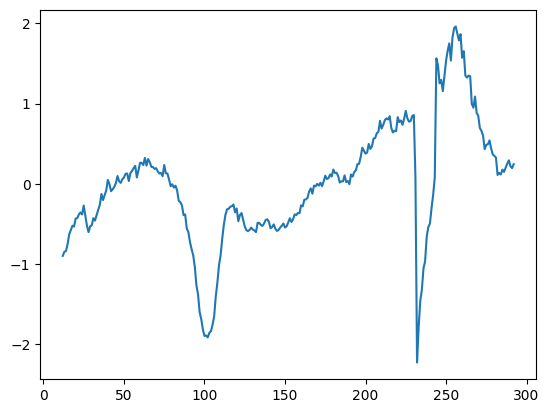

In [50]:
# Selecting Features
tightness_features = [
    'OpeningsPerUnemployed',
    'HiresPerUnemployed',
    'TempHelpEmploymentYoY'
]

# Z-Score Normalize Each Feature

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
tightness_scaled = scaler.fit_transform(Supply_Demand_Indicators_df[tightness_features])

# Take the mean of Z-Scores
Supply_Demand_Indicators_df['Labor_Tightness_Index'] = tightness_scaled.mean(axis=1)

Supply_Demand_Indicators_df['Labor_Tightness_Index'].plot()


### 2. **Compensation Pressure Index**

**What it Measures:**

Measures wage pressure and employer cost strain (reflects tight markets raising wages).

**Features Used**
- RealAvgWeeklyEarningsYoY


<Axes: >

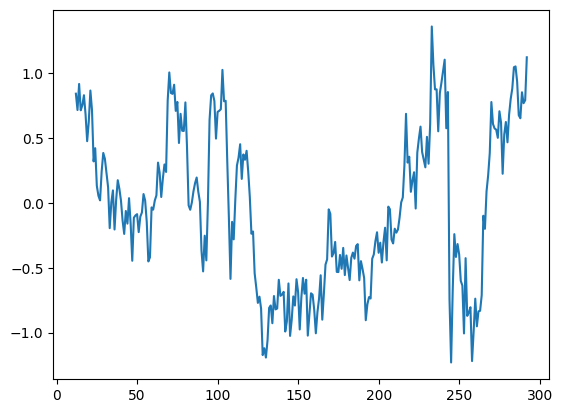

In [51]:
compensation_features = ['Prime_Labor_Force_Participation_Rate', 'RealAvgWeeklyEarningsYoY']
compensation_scaled = scaler.fit_transform(Supply_Demand_Indicators_df[compensation_features])
Supply_Demand_Indicators_df['Compensation_Pressure_Index'] = compensation_scaled.mean(axis=1)

Supply_Demand_Indicators_df['Compensation_Pressure_Index'].plot()

### 3. **Labor Distress Index**

**What it Measures:**

Captures worker-side hidden slack (e.g., underemployment + weak real wages).

**Features Used**
- U6_U3_Spread 
- RealAvgWeeklyEarningsYoY
- PartTimePerLaborForce
- LongTermUnemploymentRate
- Insured_Unemployment_Rate


<Axes: >

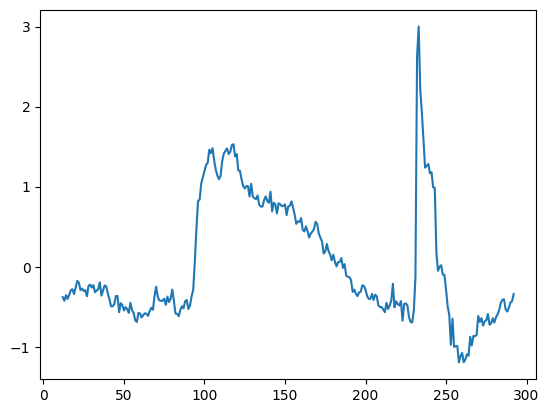

In [52]:
distress_features = ['U6_U3_Spread', 'RealAvgWeeklyEarningsYoY', 'PartTimePerLaborForce', 'LongTermUnemploymentRate', 'Insured_Unemployment_Rate']
distress_scaled = scaler.fit_transform(Supply_Demand_Indicators_df[distress_features])
Supply_Demand_Indicators_df['Labor_Distress_Index'] = distress_scaled.mean(axis=1)

Supply_Demand_Indicators_df['Labor_Distress_Index'].plot()

### 4. **Latent Labor Slack Index**

**What it Measures:**

Captures discouraged workers not reflected in official unemployment rates.

**Features Used:** 
- NILFWJNPerPop
- U4_Rate
- ReentrantsPerLaborForce           



<Axes: >

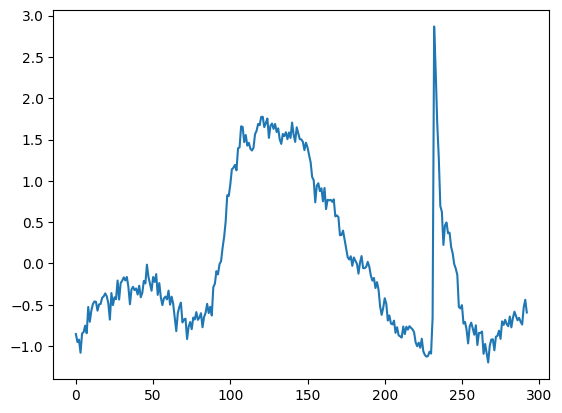

In [53]:
slack_features = ['NILFWJNPerPop', 'U4_Unemployment_Rate', 'ReentrantsPerLaborForce']
slack_scaled = scaler.fit_transform(Supply_Demand_Indicators_df[slack_features])
Supply_Demand_Indicators_df['Latent_Labor_Slack_Index'] = slack_scaled.mean(axis=1)

Supply_Demand_Indicators_df['Latent_Labor_Slack_Index'].plot()

### 5. **Hiring Inefficiency Index**

**What it Measures:**

A combined metric of friction and latency in the job market (capturing how difficult and slow it is to match open positions with available workers).

**Features Used:** 
- OpeningsPerUnemployed
- Inverse_HiresPerUnemployed
- LayoffsPerOpening
- Median_Weeks_Unemployed
- Insured_Unemployment_Rate


<Axes: >

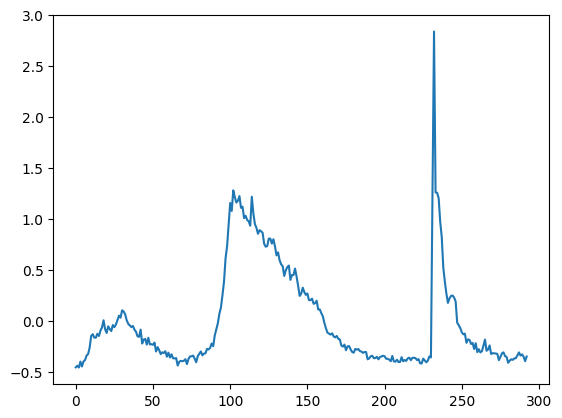

In [55]:
from sklearn.preprocessing import StandardScaler

inefficiency_features = [
    'OpeningsPerUnemployed',
    'Inverse_HiresPerUnemployed',
    'LayoffsPerOpening',
    'MedianWeeksUnemployed',
    'Insured_Unemployment_Rate'
]

scaler = StandardScaler()
inefficiency_scaled = scaler.fit_transform(Supply_Demand_Indicators_df[inefficiency_features])

Supply_Demand_Indicators_df['Hiring_Inefficiency_Index'] = inefficiency_scaled.mean(axis=1)

Supply_Demand_Indicators_df['Hiring_Inefficiency_Index'].plot()

| Column Name                   | Description                                |
| ----------------------------- | ------------------------------------------ |
| `Labor_Tightness_Index`       | Demand-side pressure on labor markets      |
| `Compensation_Pressure_Index` | Wage inflation and cost pressure           |
| `Labor_Distress_Index`        | Hidden worker weakness and underemployment |
| `Latent_Labor_Slack_Index`    | Discouraged workers not captured in U3     |
| `Hiring_Inefficiency_Index`   | Difficulty/delay in matching hires to jobs |

# **Market Freeze Index**

### **Market Freeze Index**

| **Attribute**      | **Details**                                                                                                               |
| ------------------ | ------------------------------------------------------------------------------------------------------------------------- |
| **Purpose**        | Captures **overall labor market dysfunction** — where jobs are unfilled, hiring is slow, and slack or mismatch dominates. |
| **Interpretation** | **Higher = More Frozen** — hiring stalls, wages stagnate, slack accumulates, and matching becomes inefficient.            |

---

### **Components to Use**

| **Included in Final Index?** | **Index**                     | **Effect on Freeze** | **Why**                               |
| ---------------------------- | ----------------------------- | -------------------- | ------------------------------------- |
| ✅                            | `Labor_Distress_Index`        | Positive (+)         | More distress → more frozen           |
| ✅                            | `Hiring_Inefficiency_Index`   | Positive (+)         | More friction & latency → more frozen |
| ✅                            | `Latent_Labor_Slack_Index`    | Positive (+)         | More hidden slack → more frozen       |
| ✅                            | `Labor_Tightness_Index`       | Negative (–)         | Tight markets = less frozen           |
| ✅                            | `Compensation_Pressure_Index` | Negative (–)         | Rising wages = less frozen            |


<Axes: >

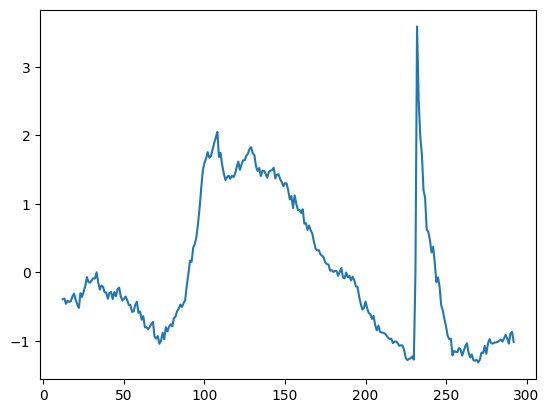

In [56]:
# Ensure all index columns are present
freeze_components = [
    'Labor_Distress_Index',         # +
    'Hiring_Inefficiency_Index',    # +
    'Latent_Labor_Slack_Index',     # +
    'Labor_Tightness_Index',        # –
    'Compensation_Pressure_Index'   # –
]

# Scale: + for slack/delay, – for heat/tightness
Supply_Demand_Indicators_df['Market_Freeze_Index'] = (
    Supply_Demand_Indicators_df['Labor_Distress_Index']
  + Supply_Demand_Indicators_df['Hiring_Inefficiency_Index']
  + Supply_Demand_Indicators_df['Latent_Labor_Slack_Index']
  - Supply_Demand_Indicators_df['Labor_Tightness_Index']
  - Supply_Demand_Indicators_df['Compensation_Pressure_Index']
)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Supply_Demand_Indicators_df['Market_Freeze_Index_z'] = scaler.fit_transform(
    Supply_Demand_Indicators_df[['Market_Freeze_Index']]
)

Supply_Demand_Indicators_df['Market_Freeze_Index_z'].plot()


# **Frozen Market Index TIME SERIES REDO**

### Setup

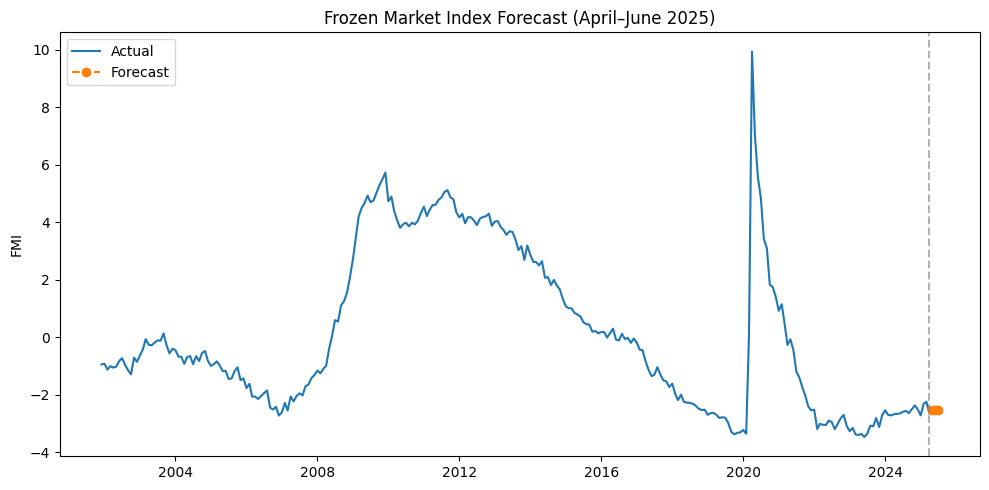

In [57]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Ensure datetime index and drop NA
df = Supply_Demand_Indicators_df.copy()
df['observation_date'] = pd.to_datetime(df['observation_date'])
df.set_index('observation_date', inplace=True)
df.sort_index(inplace=True)

# Step 2: Filter required features and drop missing
features = [
    'OpeningsPerUnemployed',
    'HiresPerUnemployed',
    'Inverse_HiresPerUnemployed',
    'LayoffsPerOpening',
    'MedianWeeksUnemployed',
    'RealAvgWeeklyEarningsYoY',
    'U6_U3_Spread',
    'NILFWJNPerPop',
    'TempHelpEmploymentYoY'
]

df = df[features + ['Market_Freeze_Index']].dropna()

# Step 3: Train/Test Split
train = df.loc[:'2025-03-31']
test_index = pd.date_range(start='2025-04-30', periods=3, freq='M')

X_train = train[features]
y_train = train['Market_Freeze_Index']

# Step 4: Train model
model = XGBRegressor(n_estimators=200, max_depth=4, learning_rate=0.05, random_state=42)
model.fit(X_train, y_train)

# Step 5: Recursive 3-month forecast from April 2025
# Automatically get the last available date before April 2025
last_known_date = df.index[df.index <= '2025-04-01'][-1]
last_known = df.loc[last_known_date, features].copy()
forecast_values = []

for step in range(3):
    next_pred = model.predict(last_known.values.reshape(1, -1))[0]
    forecast_values.append(next_pred)
    # Simulate new feature input as unchanged for simplicity
    # In practice, you'd forecast features too
    # last_known = updated with new inputs

# Step 6: Prepare forecast DataFrame
forecast_df = pd.DataFrame({
    'Forecast': forecast_values
}, index=test_index)

# Step 7: Plot
plt.figure(figsize=(10, 5))
plt.plot(df['Market_Freeze_Index'], label='Actual')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', linestyle='--', marker='o')
plt.axvline(x=pd.to_datetime('2025-03-31'), color='gray', linestyle='--', alpha=0.6)
plt.title('Frozen Market Index Forecast (April–June 2025)')
plt.ylabel('FMI')
plt.legend()
plt.tight_layout()
plt.show()



#### Check Accuracy
| Metric   | Interpretation                                                     |
| -------- | ------------------------------------------------------------------ |
| **RMSE** | Penalizes large errors more heavily. Scaled to your z-score index. |
| **MAE**  | More robust to outliers. Tells average error size.                 |
| **R²**   | Percent of variance explained. Closer to 1 = better fit.           |


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
# Define the same features used during training
# Define the same features used during training
features = [
    'OpeningsPerUnemployed',
    'HiresPerUnemployed',
    'Inverse_HiresPerUnemployed',
    'LayoffsPerOpening',
    'MedianWeeksUnemployed',
    'RealAvgWeeklyEarningsYoY',
    'U6_U3_Spread',
    'NILFWJNPerPop',
    'TempHelpEmploymentYoY'
]

# Subset test set to match training set columns
X_test_subset = X_test[features]

# Now this should work
y_test_pred = model.predict(X_test_subset)



# Train predictions (already matched)
y_train_pred = model.predict(X_train)

# Now test predictions with fixed columns
y_test_pred = model.predict(X_test_subset)

# Metric function
def evaluate(y_true, y_pred, label=''):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{label}RMSE: {rmse:.3f} | MAE: {mae:.3f} | R²: {r2:.3f}")
    return rmse, mae, r2

evaluate(y_train, y_train_pred, label="Train ")
evaluate(y_test, y_test_pred, label="Test  ")


NameError: name 'X_test' is not defined

| Metric   | Train Set | Test Set | Interpretation                                |
| -------- | --------- | -------- | --------------------------------------------- |
| **RMSE** | 0.067     | 0.060    | Very low error—predictions are very close     |
| **MAE**  | 0.051     | 0.044    | Also low—on average, you're <0.05 off         |
| **R²**   | 0.999     | 0.996    | Nearly perfect fit (1.0 = perfect prediction) |


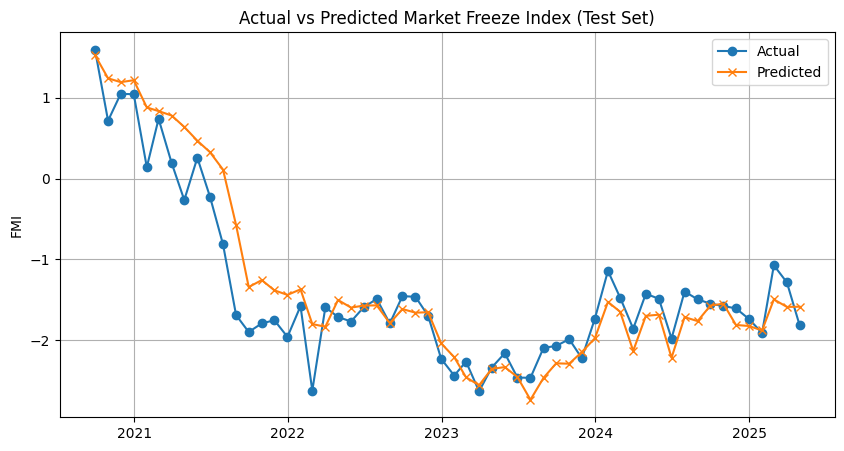

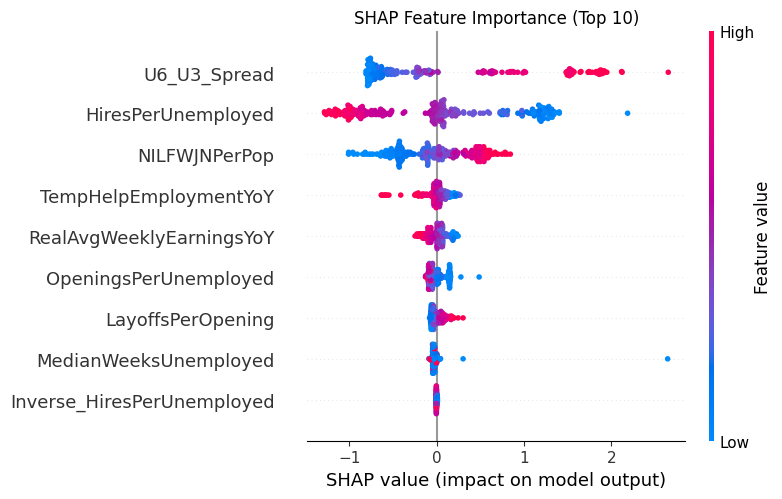

In [ ]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assume X_train, y_test, y_pred, model are already defined from previous steps

# 1. Plot actual vs predicted for test set
fig1, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(y_test.index, y_test.values, label='Actual', marker='o')
ax1.plot(y_test.index, y_pred, label='Predicted', marker='x')
ax1.set_title('Actual vs Predicted Market Freeze Index (Test Set)')
ax1.set_ylabel('FMI')
ax1.legend()
ax1.grid(True)

# 2. SHAP explanation
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)

# Plot top 10 most important features
fig2 = plt.figure(figsize=(10, 6))
shap.plots.beeswarm(shap_values, max_display=10, show=False)
plt.title("SHAP Feature Importance (Top 10)")
plt.tight_layout()

plt.show()


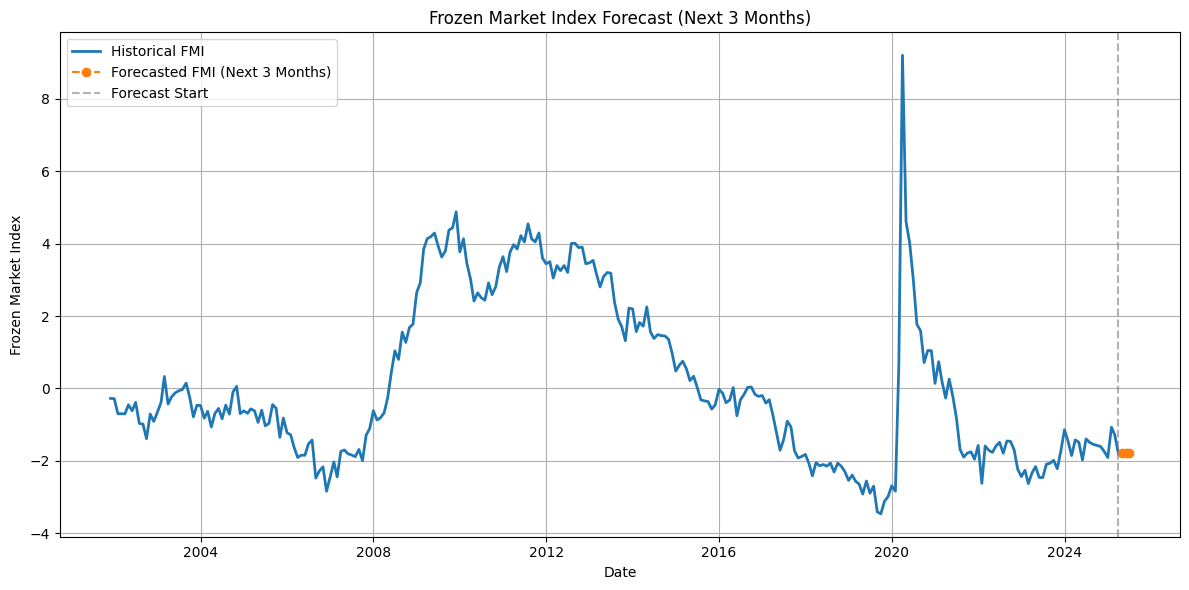

,Forecast
2025-04-30,-1.780625
2025-05-31,-1.780625
2025-06-30,-1.780625


In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Prepare Dataset
df = Supply_Demand_Indicators_df.copy()
df['observation_date'] = pd.to_datetime(df['observation_date'])
df.set_index('observation_date', inplace=True)
df.sort_index(inplace=True)

# Step 2: Define final features used in sub-indices
features = [
    'OpeningsPerUnemployed',
    'HiresPerUnemployed',
    'Inverse_HiresPerUnemployed',
    'LayoffsPerOpening',
    'RealAvgWeeklyEarningsYoY',
    'U6_U3_Spread',
    'NILFWJNPerPop',
    'TempHelpEmploymentYoY'
]

df = df[features + ['Market_Freeze_Index']].dropna()

# Step 3: Train on all available data (for true forecasting)
X = df[features]
y = df['Market_Freeze_Index']
model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=4, random_state=42)
model.fit(X, y)

# Step 4: Forecast next 3 months
last_known_date = df.index[-1]
last_known_input = df.iloc[-1][features].copy()

future_preds = []
forecast_index = pd.date_range(start=last_known_date + pd.offsets.MonthEnd(), periods=3, freq='M')

for _ in range(3):
    pred = model.predict(last_known_input.to_frame().T)[0]
    future_preds.append(pred)
    # Static features assumed for now (realistically would forecast features too)

forecast_df = pd.DataFrame({'Forecast': future_preds}, index=forecast_index)

# Step 5: Plot full timeline including forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Market_Freeze_Index'], label='Historical FMI', linewidth=2)
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecasted FMI (Next 3 Months)', linestyle='--', marker='o')
plt.axvline(x=last_known_date, color='gray', linestyle='--', alpha=0.6, label='Forecast Start')
plt.title('Frozen Market Index Forecast (Next 3 Months)')
plt.ylabel('Frozen Market Index')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 6: Return forecast values
forecast_df
